In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel(r"C:\Users\Karti\Downloads/Online Retaill.xlsx")

In [10]:
print("First five row of the data")
print(df.head())

First five row of the data
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [12]:
print("The shape of the data:" , df.shape)

The shape of the data: (541909, 8)


In [24]:
print("Data info")
df.info()

Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [31]:
print("Missing Value :")
df.isnull().sum()

Missing Value :


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [22]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [33]:
data = df.copy

In [51]:
data = df.copy()
data['InvoiceNo'] = data['InvoiceNo'].astype(str)
data = data[~data['InvoiceNo'].str.startswith('C')]
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
print("✅ Cleaned Data Shape:", data.shape)
print(data.head())
print("\nMissing Values:")
print(data.isnull().sum())


✅ Cleaned Data Shape: (530104, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Missing Values:
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
Custom

In [59]:
df_fe =df.copy()

In [61]:
df_fe['TotalPrice'] = df_fe['Quantity'] * df_fe['UnitPrice']

In [63]:
df_fe['InvoiceDate'] = pd.to_datetime(df_fe['InvoiceDate'])

In [65]:
df_fe['Year'] = df_fe['InvoiceDate'].dt.year
df_fe['Month'] = df_fe['InvoiceDate'].dt.month_name()
df_fe['DayOfWeek'] = df_fe['InvoiceDate'].dt.day_name()
df_fe['Hour'] = df_fe['InvoiceDate'].dt.hour

In [69]:
print(df_fe[['InvoiceDate', 'TotalPrice', 'Year', 'Month', 'DayOfWeek', 'Hour']].head())

          InvoiceDate  TotalPrice  Year     Month  DayOfWeek  Hour
0 2010-12-01 08:26:00       15.30  2010  December  Wednesday     8
1 2010-12-01 08:26:00       20.34  2010  December  Wednesday     8
2 2010-12-01 08:26:00       22.00  2010  December  Wednesday     8
3 2010-12-01 08:26:00       20.34  2010  December  Wednesday     8
4 2010-12-01 08:26:00       20.34  2010  December  Wednesday     8


In [73]:
top_products_revenue = df_fe.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_products_revenue

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: TotalPrice, dtype: float64

In [81]:
print("\nTop 10 Products by Revenue: \n")
print(top_products_revenue)


Top 10 Products by Revenue: 

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
Name: TotalPrice, dtype: float64


In [83]:
top_products_quantity = df_fe.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

In [85]:
print("\nTop 10 Products by Quantity Sold:\n")
top_products_quantity


Top 10 Products by Quantity Sold:



Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

In [87]:
returned_products = df[df['Quantity'] < 0].groupby('Description')['Quantity'].sum().sort_values().head(10)


In [89]:
print("\nTop Returned Products:\n")
returned_products


Top Returned Products:



Description
PAPER CRAFT , LITTLE BIRDIE           -80995
MEDIUM CERAMIC TOP STORAGE JAR        -74494
printing smudges/thrown away          -19200
Unsaleable, destroyed.                -15644
check                                 -13247
?                                      -9496
ROTATING SILVER ANGELS T-LIGHT HLDR    -9376
Printing smudges/thrown away           -9058
Damaged                                -7540
throw away                             -5368
Name: Quantity, dtype: int64

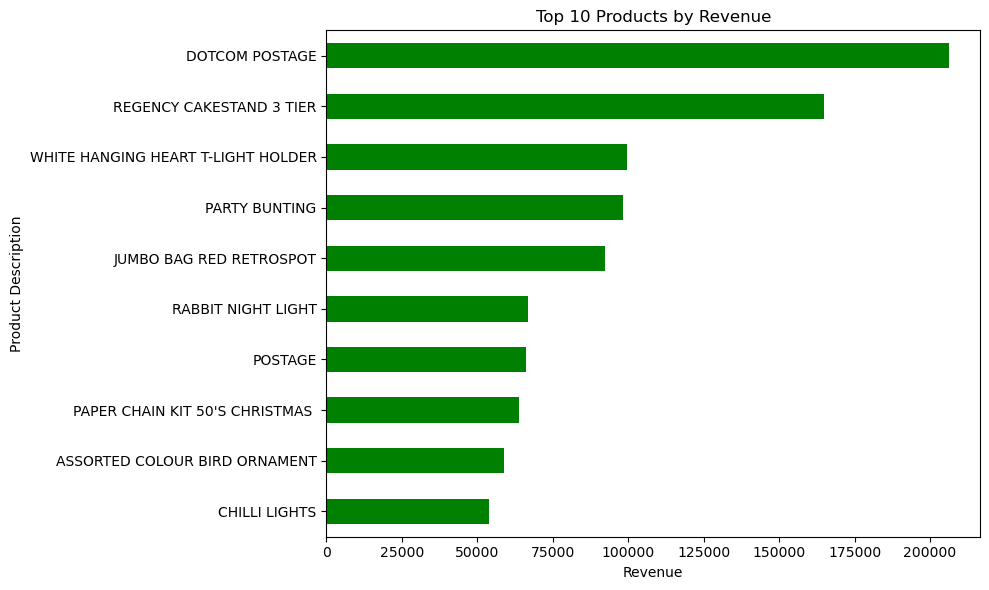

In [109]:
top_products_revenue = df_fe.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
top_products_revenue.plot(kind='barh', color='green')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product Description")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [111]:
monthly_sales = df_fe.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()

In [113]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales['Month'] = pd.Categorical(monthly_sales['Month'], categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_values(by=['Year', 'Month'])

In [117]:
monthly_sales

,Year,Month,TotalPrice
0,2010,December,748957.020
5,2011,January,560000.260
4,2011,February,498062.650
8,2011,March,683267.080
1,2011,April,493207.121
9,2011,May,723333.510
7,2011,June,691123.120
6,2011,July,681300.111
2,2011,August,682680.510
12,2011,September,1019687.622


In [120]:
month_order

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [122]:
monthly_sales['Month'] 

0      December
5       January
4      February
8         March
1         April
9           May
7          June
6          July
2        August
12    September
11      October
10     November
3      December
Name: Month, dtype: category
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [124]:
monthly_sales

,Year,Month,TotalPrice
0,2010,December,748957.020
5,2011,January,560000.260
4,2011,February,498062.650
8,2011,March,683267.080
1,2011,April,493207.121
9,2011,May,723333.510
7,2011,June,691123.120
6,2011,July,681300.111
2,2011,August,682680.510
12,2011,September,1019687.622


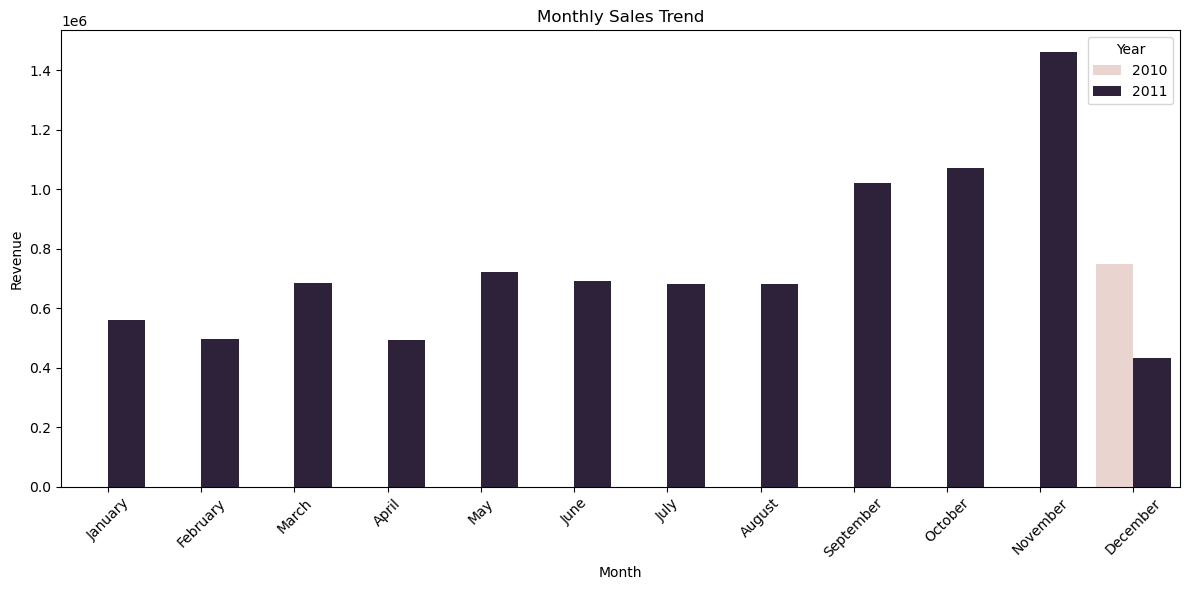

In [126]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_sales, x='Month', y='TotalPrice', hue='Year')
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [128]:
weekday_sales = df_fe.groupby('DayOfWeek')['TotalPrice'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_sales

DayOfWeek
Monday       1588609.431
Tuesday      1966182.791
Wednesday    1734147.010
Thursday     2112519.000
Friday       1540610.811
Saturday             NaN
Sunday        805678.891
Name: TotalPrice, dtype: float64

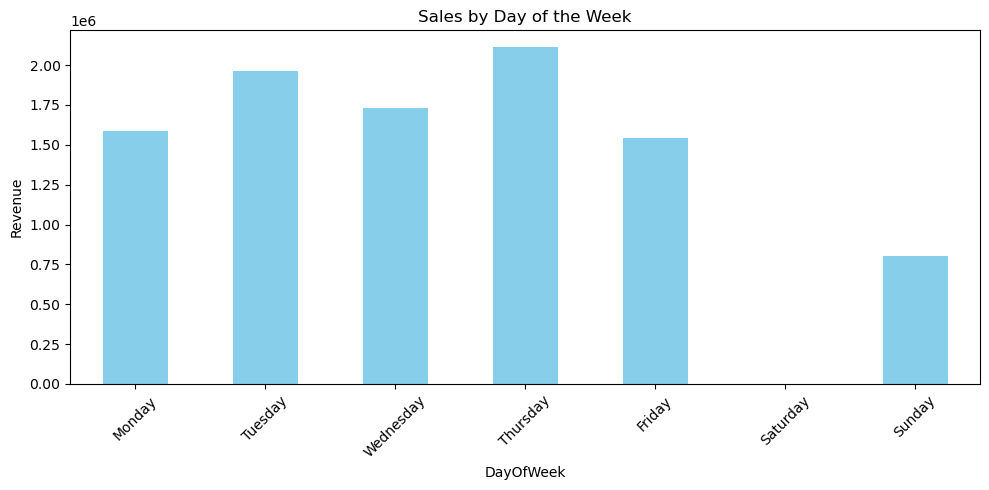

In [130]:

plt.figure(figsize=(10,5))
weekday_sales.plot(kind='bar', color='skyblue')
plt.title("Sales by Day of the Week")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

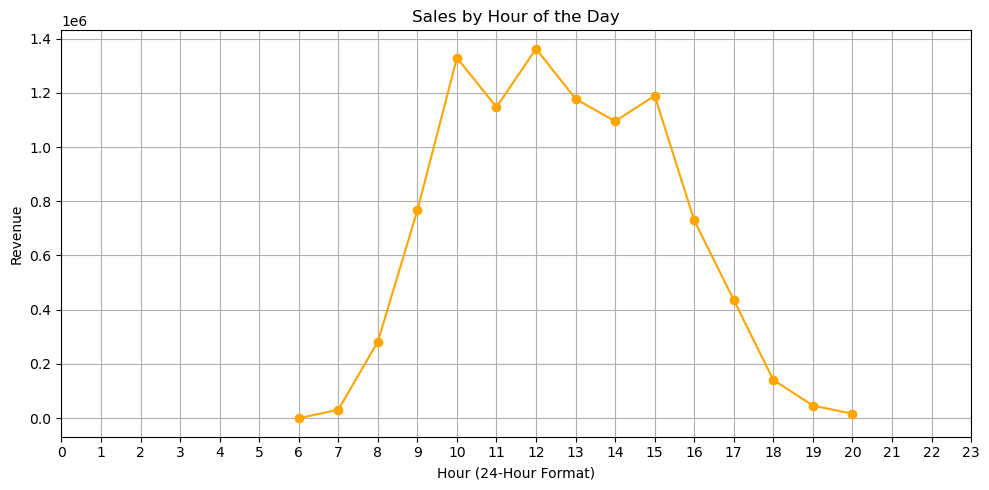

In [132]:
hourly_sales = df_fe.groupby('Hour')['TotalPrice'].sum()

plt.figure(figsize=(10,5))
hourly_sales.plot(kind='line', marker='o', color='orange')
plt.title("Sales by Hour of the Day")
plt.xlabel("Hour (24-Hour Format)")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


In [138]:
country_sales = df_fe.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_sales_wo_uk = country_sales.drop('United Kingdom', errors='ignore')
top_10_countries = country_sales_wo_uk.head(10)
print("🌍 Top 10 Countries by Revenue (excluding UK):")
top_10_countries


🌍 Top 10 Countries by Revenue (excluding UK):


Country
Netherlands    284661.54
EIRE           263276.82
Germany        221698.21
France         197403.90
Australia      137077.27
Switzerland     56385.35
Spain           54774.58
Belgium         40910.96
Sweden          36595.91
Japan           35340.62
Name: TotalPrice, dtype: float64

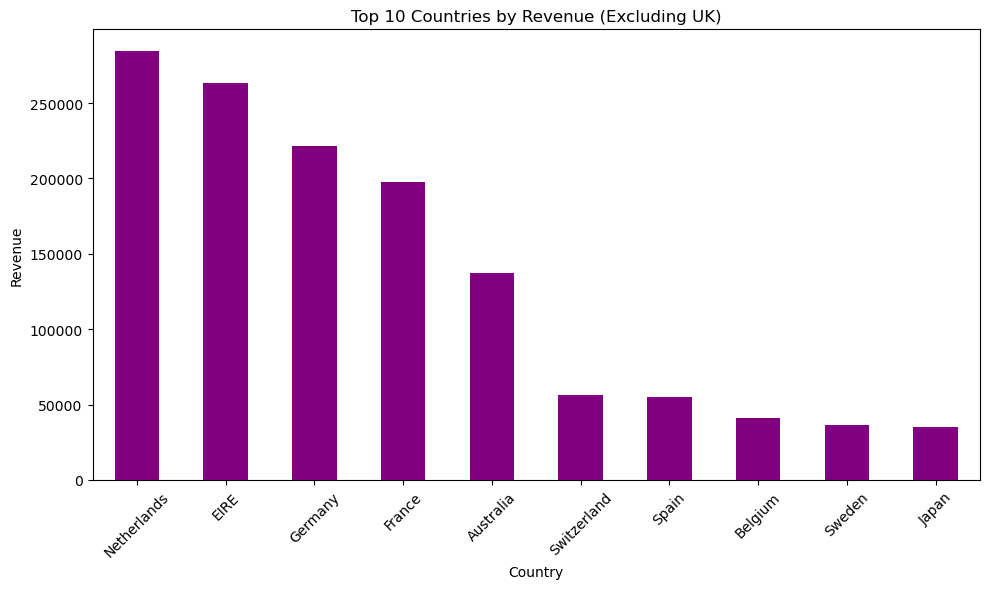

In [140]:
plt.figure(figsize=(10,6))
top_10_countries.plot(kind='bar', color='purple')
plt.title("Top 10 Countries by Revenue (Excluding UK)")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [142]:
rfm_data = df_fe[df_fe['CustomerID'].notnull()].copy()
reference_date = rfm_data['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = rfm_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,     # Recency
    'InvoiceNo': 'nunique',                                       # Frequency
    'TotalPrice': 'sum'                                           # Monetary
}).reset_index()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [144]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].astype(int).sum(axis=1)

print(rfm.head())


   CustomerID  Recency  Frequency  Monetary R_Score F_Score M_Score  \
0     12346.0      326          2      0.00       1       2       1   
1     12347.0        2          7   4310.00       5       4       5   
2     12348.0       75          4   1797.24       2       3       4   
3     12349.0       19          1   1757.55       4       1       4   
4     12350.0      310          1    334.40       1       1       2   

  RFM_Segment  RFM_Score  
0         121          4  
1         545         14  
2         234          9  
3         414          9  
4         112          4  


In [146]:
 def rfm_category(row):
    if row['RFM_Score'] >= 13:
        return 'VIP'
    elif row['RFM_Score'] >= 10:
        return 'Loyal'
    elif row['RFM_Score'] >= 7:
        return 'Potential'
    else:
        return 'At Risk'

rfm['Customer_Type'] = rfm.apply(rfm_category, axis=1)

rfm['Customer_Type'].value_counts()


Customer_Type
At Risk      1319
Potential    1114
Loyal         990
VIP           949
Name: count, dtype: int64

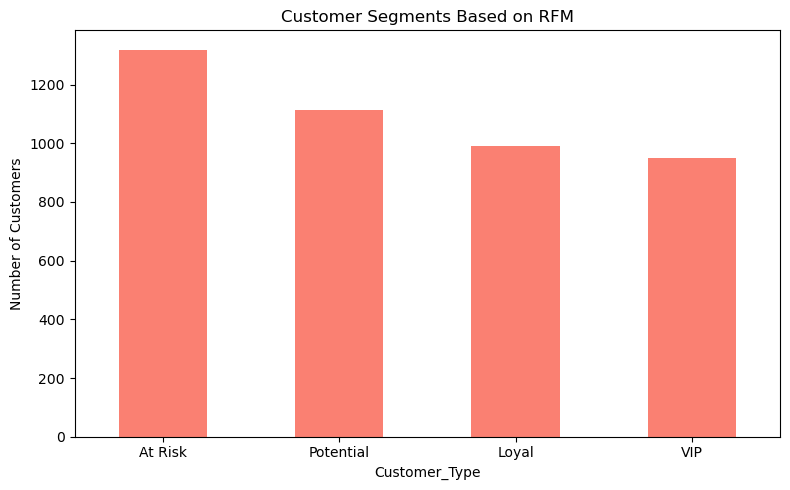

In [148]:
plt.figure(figsize=(8,5))
rfm['Customer_Type'].value_counts().plot(kind='bar', color='salmon')
plt.title("Customer Segments Based on RFM")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()